In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

PassengerId 는 필요없다.
Sex 는 남/여 로 구분, 의미있는 정보라고 생각.
Nam 은 어떻게 나눌 수 있을까?
Pclass, Cabin 좌석별로 살 수 있는 차이가 확연히 날 것이라고 판단된다.
-> 과연? 침몰시간에 사람들이 모두 자신들의 좌석에 있었다는 확신이 부족하다. 침몰시간을 살펴보자.
Fare? 흠
Embarked 어디서 탔는지.. 충분히 고려해볼만한 정보일 것
남은건, Age, SibSp, Parch

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() #setting seaborn default for plots

### age에서 nan값을 채워줘야하는데, nan값을 가진 사람들의 특징을 고려해보아야 하지 않을까?

In [4]:
age_nan_rows = train[train['Age'].isnull()]

In [5]:
age_nan_rows.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


### 먼저 가장 간단한 성별을 0,1로 표시

In [6]:
from sklearn.preprocessing import LabelEncoder
train['Sex'] = LabelEncoder().fit_transform(train['Sex'])
test['Sex'] = LabelEncoder().fit_transform(test['Sex'])

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


### 이름의 뒷부분을 고려하기엔 케이스가 너무 많아진다. 이름에서 앞의 성만 따서 생각해보자.

In [9]:
train['Name'] = train['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
titles = train['Name'].unique()
titles
test['Name'] = test['Name'].map(lambda x: x.split(',')[1].split('.')[0].strip())
test_titles = test['Name'].unique()
test_titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [10]:
titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [11]:
test_titles

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

### 나이의 nan값을 채워주기 위해서, 이름의 성별로 중간값을 구하자.
남자별, 여자별로 나누어도 좋지만 성별로 하는 것이 더 정확하지 않을까?

하지만 성별로 나누는 것도 정확한 기준이 부족하다. 해당 부분에 대해서 좀 더 생각해볼 필요가 있다.

In [12]:
train['Age'].fillna(-1, inplace=True)
test['Age'].fillna(-1, inplace=True)

medians = dict()
for title in titles:
    median = train.Age[(train["Age"] != -1) & (train['Name'] == title)].median()
    medians[title] = median

In [13]:
for index, row in train.iterrows():
    if row['Age'] == -1:
        train.loc[index, 'Age'] = medians[row['Name']]

for index, row in test.iterrows():
    if row['Age'] == -1:
        test.loc[index, 'Age'] = medians[row['Name']]

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


In [14]:
medians

{'Mr': 30.0,
 'Mrs': 35.0,
 'Miss': 21.0,
 'Master': 3.5,
 'Don': 40.0,
 'Rev': 46.5,
 'Dr': 46.5,
 'Mme': 24.0,
 'Ms': 28.0,
 'Major': 48.5,
 'Lady': 48.0,
 'Sir': 49.0,
 'Mlle': 24.0,
 'Col': 58.0,
 'Capt': 70.0,
 'the Countess': 33.0,
 'Jonkheer': 38.0}

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,Mrs,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,Mr,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,Mr,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,Mrs,0,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [20]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
test_age_nan_rows = test[test['Age'].isnull()]

In [22]:
test_age_nan_rows

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,S


### 각 이름별로 산사람과 죽은 사람을 비교해보자.

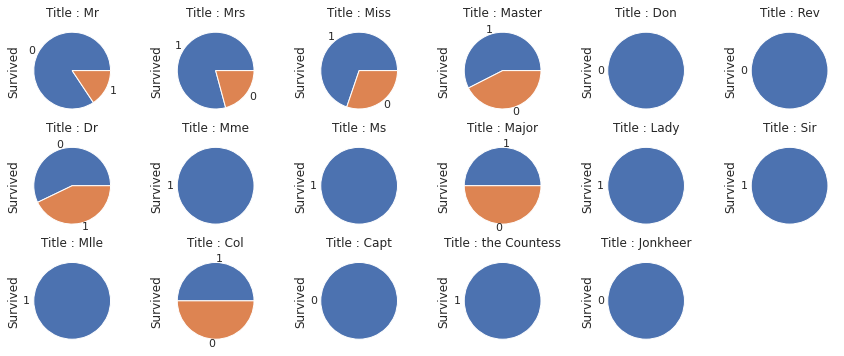

In [24]:
fig = plt.figure(figsize=(15,6))

i=1
for title in train['Name'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Title : {}'.format(title))
    train.Survived[train['Name'] == title].value_counts().plot(kind='pie')
    i += 1

### 각 이름별로 많이 죽은 성 -> 적게 죽은 성 순서로 값을 매기자

In [25]:
title_replace = {
    'Don':0,
    'Rev':0,
    'Capt':0,
    'Jonkheer':0,
    'Mr':1,
    'Dr':2,
    'Major':3,
    'Col':3,
    'Master':4,
    'Miss':5,
    'Mrs':6,
    'Mme':7,
    'Ms':7,
    'Lady':7,
    'Sir':7,
    'Mlle':7,
    'the Countess':7
}


In [26]:
train['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

### test에는 Dona라는 성이 있지만, train에는 없다.

In [27]:
test['Name'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [28]:
test[test['Name'] == 'Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,Dona,0,39.0,0,0,PC 17758,108.9,C105,C


In [29]:
train['Name'] = train['Name'].apply(lambda x: title_replace.get(x))

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,6,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,5,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,6,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,1,35.0,0,0,373450,8.0500,NaN,S


In [31]:
test['Name'] = test['Name'].apply(lambda x: title_replace.get(x))

In [32]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             1
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [33]:
test[test['Name'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
414,1306,1,NaN,0,39.0,0,0,PC 17758,108.9,C105,C


### Dona성을 가진 사람은 해당 성별에서 name에 대한 중간값을 넣어주자.

In [34]:
test[test['Sex'] == 0]['Name'].mean()

5.490066225165563

In [35]:
train[train['Sex'] == 0]['Name'].mean()

5.426751592356688

In [36]:
test[test['Name'].isnull()]['Sex']

414    0
Name: Sex, dtype: int64

In [37]:
test[test['Name'].isnull()]['Name']

414   NaN
Name: Name, dtype: float64

In [38]:
test['Name'] = test['Name'].fillna(value=train[train['Sex'] == 0]['Name'].mean())

In [39]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1.0,1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,6.0,0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,1.0,1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,1.0,1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,6.0,0,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [41]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
train_test_data = [train, test]

### 나이를 세분화하자, 10살부터 5살 단위로 60살까지

In [43]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age']<=10, 'Age'] = 0
    dataset.loc[(dataset['Age']>10)&(dataset['Age']<=16), 'Age'] = 1
    dataset.loc[(dataset['Age']>16)&(dataset['Age']<=20), 'Age'] = 2
    dataset.loc[(dataset['Age']>20)&(dataset['Age']<=26), 'Age'] = 3
    dataset.loc[(dataset['Age']>26)&(dataset['Age']<=30), 'Age'] = 4
    dataset.loc[(dataset['Age']>30)&(dataset['Age']<=36), 'Age'] = 5
    dataset.loc[(dataset['Age']>36)&(dataset['Age']<=40), 'Age'] = 6
    dataset.loc[(dataset['Age']>40)&(dataset['Age']<=46), 'Age'] = 7
    dataset.loc[(dataset['Age']>46)&(dataset['Age']<=50), 'Age'] = 8
    dataset.loc[(dataset['Age']>50)&(dataset['Age']<=60), 'Age'] = 9
    dataset.loc[ dataset['Age']>60, 'Age'] = 10

# for dataset in train_test_data:
#     dataset.loc[ dataset['Age'] <= 10, 'Age'] = 0
#     dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 16), 'Age'] = 1
#     dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#     dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#     dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,S
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,S


### 나눈 나이에 대해 나이별로 죽은사람과 산사람 비율을 확인하자

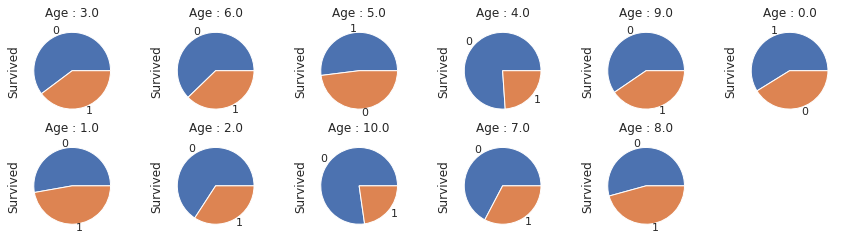

In [44]:
fig = plt.figure(figsize=(15,6))

i=1
for age in train['Age'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Age : {}'.format(age))
    train.Survived[train['Age'] == age].value_counts().plot(kind='pie')
    i += 1

### 이 또한 name과 같이 값을 매기자

In [45]:
age_point_replace = {
    0: 8,
    1: 6,
    2: 2,
    3: 4,
    4: 1,
    5: 7,
    6: 3,
    7: 2,
    8: 5,
    9: 4,
    10: 0
    
}

In [46]:
for dataset in train_test_data:
    dataset['age_point'] = dataset['Age'].apply(lambda x: age_point_replace.get(x))

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,S,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,S,7


In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,S,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,S,7


In [49]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,892,3,1.0,1,5.0,0,0,330911,7.8292,NaN,Q,7
1,893,3,6.0,0,8.0,1,0,363272,7.0000,NaN,S,5
2,894,2,1.0,1,10.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,1.0,1,4.0,0,0,315154,8.6625,NaN,S,1
4,896,3,6.0,0,3.0,1,1,3101298,12.2875,NaN,S,4


In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,S,4
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,S,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,S,7


### Embarked가 nan인 사람은 S로 채워주자. 이를 보다 근거있는 값으로 채울 수는 없는지 고민해보자.

In [51]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [52]:
embarked_mapping = {'S':0, 'C':1, 'Q':2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

In [53]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7


In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_point
0,1,0,3,1,1,3.0,1,0,A/5 21171,7.2500,NaN,0,4
1,2,1,1,6,0,6.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,5,0,3.0,0,0,STON/O2. 3101282,7.9250,NaN,0,4
3,4,1,1,6,0,5.0,1,0,113803,53.1000,C123,0,7
4,5,0,3,1,1,5.0,0,0,373450,8.0500,NaN,0,7


# 실습 2_3 수정 부분(SibSp, Parch)

## 주석 처리한 이전 코드들

### SibSp와 Parch값을 이용하여 FamilySize를 추가한다.

In [55]:
# for dataset in train_test_data:
#     dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

### FamilySize가 4보다 큰 남자는 아버지일 확률이 높다.
사회적으로 아버지는 자신의 가족을 먼저 살리려고 할 것이라 생각했다.

여기에 나이도 추가하면 더 좋을수도 있다.

In [56]:
# maybe_dad_mask = (train['FamilySize'] > 4) & (train['Sex'] == 1)

In [57]:
# maybe_dad_mask.head()

In [58]:
# train['maybe_dad'] = 1

In [59]:
# train.head()

In [60]:
# train.loc[maybe_dad_mask,'maybe_dad'] = 0

In [61]:
# train[train['maybe_dad'] == 0].head()

### 그럼 아버지로 분류된 사람들이나 아버지가 아닌 사람으로 분류된 사람들의 생존비율은 어떻게 될까?

In [62]:
# # fig = plt.figure(figsize=(15,6))

# # i=1
# # for title in train['Name'].unique():
# #     fig.add_subplot(3, 6, i)
# #     plt.title('Title : {}'.format(title))
# #     train.Survived[train['Name'] == title].value_counts().plot(kind='pie')
# #     i += 1
# fig = plt.figure()
# ax1 = train.Survived[train['maybe_dad'] == 1].value_counts().plot(kind='pie')

In [63]:
# ax2 = train.Survived[train['maybe_dad'] == 0].value_counts().plot(kind='pie')

In [64]:
# test['maybe_dad'] = 1
# test_maybe_dad_mask = (test['FamilySize'] > 4) & (test['Sex'] == 1)
# test.loc[test_maybe_dad_mask,'maybe_dad'] = 0

In [65]:
# test.head()

### FamilySize에 대해서도 새롭게 값을 매기자. 그러기 위해 FamilySize별로 생존비율 확인

In [66]:
# train['FamilySize'].unique()

In [67]:
# test['FamilySize'].unique()

In [68]:
# fig = plt.figure(figsize=(15,6))

# i=1
# for size in train['FamilySize'].unique():
#     fig.add_subplot(3, 6, i)
#     plt.title('Size : {}'.format(size))
#     train.Survived[train['FamilySize'] == size].value_counts().plot(kind='pie')
#     i += 1

In [69]:
# size_replace = {
#     1: 3,
#     2: 5,
#     3: 6,
#     4: 7,
#     5: 2,
#     6: 1,
#     7: 4,
#     8: 0,
#     11: 0
# }

In [70]:
# for dataset in train_test_data:
#     dataset['fs_point'] = dataset['FamilySize'].apply(lambda x: size_replace.get(x))
#     dataset.drop('FamilySize',axis=1,inplace=True)

In [71]:
# train.head()

In [72]:
# train.isnull().sum()

In [73]:
# test.isnull().sum()

# 추가한 코드

In [74]:
features_drop = ['SibSp','Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1) #train은 PassengerID를 가지고 있어야 한다. test 결과에 사용

### Pclass별로 생존비율 확인후 새로운 값 매기기

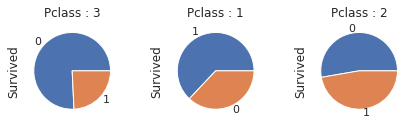

In [75]:
fig = plt.figure(figsize=(15,6))

i=1
for x in train['Pclass'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Pclass : {}'.format(x))
    train.Survived[train['Pclass'] == x].value_counts().plot(kind='pie')
    i += 1

In [76]:
for dataset in train_test_data:
    dataset.loc[dataset['Pclass']==3,'Pclass_point'] = 0
    dataset.loc[dataset['Pclass']==2,'Pclass_point'] = 1
    dataset.loc[dataset['Pclass']==1,'Pclass_point'] = 2

In [77]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,age_point
0,0,3,1,1,3.0,A/5 21171,7.2500,NaN,0,4
1,1,1,6,0,6.0,PC 17599,71.2833,C85,1,3
2,1,3,5,0,3.0,STON/O2. 3101282,7.9250,NaN,0,4
3,1,1,6,0,5.0,113803,53.1000,C123,0,7
4,0,3,1,1,5.0,373450,8.0500,NaN,0,7


### Embarked 별로

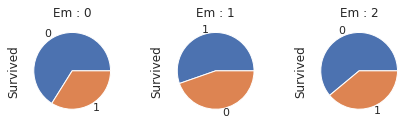

In [78]:
fig = plt.figure(figsize=(15,6))

i=1
for x in train['Embarked'].unique():
    fig.add_subplot(3, 6, i)
    plt.title('Em : {}'.format(x))
    train.Survived[train['Embarked'] == x].value_counts().plot(kind='pie')
    i += 1

In [79]:
for dataset in train_test_data:
    dataset.loc[dataset['Embarked']==0,'Em_point'] = 0
    dataset.loc[dataset['Embarked']==2,'Em_point'] = 1
    dataset.loc[dataset['Embarked']==1,'Em_point'] = 2

In [80]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,age_point
0,0,3,1,1,3.0,A/5 21171,7.2500,NaN,0,4
1,1,1,6,0,6.0,PC 17599,71.2833,C85,1,3
2,1,3,5,0,3.0,STON/O2. 3101282,7.9250,NaN,0,4
3,1,1,6,0,5.0,113803,53.1000,C123,0,7
4,0,3,1,1,5.0,373450,8.0500,NaN,0,7


In [81]:
train.isnull().sum()

Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin        687
Embarked       0
age_point      0
dtype: int64

### Cabin은 해당인원의 숙소? 가 어디있는지에 대한 값이다. 하지만 아래와 같이 값이 너무 다양하다. 뒤의 숫자는 빼고 고려해보자

In [82]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Cabin이 nan값인 사람들은 U로 채우자. U는 단지 nan값을 나타내는 문자열이다.
### 이를 Fare데이터와 비교해서 넣어도 좋을 것 같다. Fare의 nan값은 1개라서 일단 0으로 넣었다.

In [83]:
for data in train_test_data:
    data['Cabin'].fillna('U', inplace=True)
    data['Cabin'] = data['Cabin'].apply(lambda x: x[0])
    data['Cabin'].unique()
    data['Fare'].fillna(0,inplace=True)
    data['Fare'] = data['Fare'].apply(lambda x: int(x))

### Cabin별로 생존비율 확인

In [84]:
# fig = plt.figure(figsize=(15,6))

# i=1
# for x in train['Cabin'].unique():
#     fig.add_subplot(3, 6, i)
#     plt.title('Cabin : {}'.format(x))
#     train.Survived[train['Cabin'] == x].value_counts().plot(kind='pie')
#     i += 1

### Fare의 값도 너무 다양하다. 왜 그러지? 이에 대해서 궁금하다.
일단 이를 그대로 처리하는 것은 힘들 것 같다. 이 또한 구간별로 나누어 생각해보자.

In [85]:
temp = train['Fare'].unique()
temp.sort()
temp

array([  0.    ,   4.0125,   5.    ,   6.2375,   6.4375,   6.45  ,
         6.4958,   6.75  ,   6.8583,   6.95  ,   6.975 ,   7.0458,
         7.05  ,   7.0542,   7.125 ,   7.1417,   7.225 ,   7.2292,
         7.25  ,   7.3125,   7.4958,   7.5208,   7.55  ,   7.6292,
         7.65  ,   7.725 ,   7.7292,   7.7333,   7.7375,   7.7417,
         7.75  ,   7.775 ,   7.7875,   7.7958,   7.8   ,   7.8292,
         7.8542,   7.875 ,   7.8792,   7.8875,   7.8958,   7.925 ,
         8.0292,   8.05  ,   8.1125,   8.1375,   8.1583,   8.3   ,
         8.3625,   8.4042,   8.4333,   8.4583,   8.5167,   8.6542,
         8.6625,   8.6833,   8.7125,   8.85  ,   9.    ,   9.2167,
         9.225 ,   9.35  ,   9.475 ,   9.4833,   9.5   ,   9.5875,
         9.825 ,   9.8375,   9.8417,   9.8458,  10.1708,  10.4625,
        10.5   ,  10.5167,  11.1333,  11.2417,  11.5   ,  12.    ,
        12.275 ,  12.2875,  12.35  ,  12.475 ,  12.525 ,  12.65  ,
        12.875 ,  13.    ,  13.4167,  13.5   ,  13.7917,  13.8

In [86]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare']<=30, 'Fare'] = 0
    dataset.loc[(dataset['Fare']>30)&(dataset['Fare']<=80), 'Fare'] = 1
    dataset.loc[(dataset['Fare']>80)&(dataset['Fare']<=100), 'Fare'] = 2
    dataset.loc[(dataset['Fare']>100), 'Fare'] = 3

### 아까 Cabin의 값을 U로 넣어준 사람들에게 존재하는 Cabin값으로 넣어주기 위해 각 Cabin별로 어떤 Fare범위가 가장 많은지 확인하고 해당 값으로 U값을 대체한다.

In [87]:
# fig = plt.figure(figsize=(15,6))

# i=1
# for x in train['Cabin'].unique():
#     fig.add_subplot(3, 6, i)
#     plt.title('Cabin : {}'.format(x))
#     train.Fare[train['Cabin'] == x].value_counts().plot(kind='pie')
#     i += 1

In [88]:
for dataset in train_test_data:
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 0), 'Cabin'] = 'G'
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 1), 'Cabin'] = 'T'
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 2), 'Cabin'] = 'C'
    dataset.loc[(dataset['Cabin'] == 'U')&(dataset['Fare'] == 3), 'Cabin'] = 'B'

In [89]:
# fig = plt.figure(figsize=(15,6))

# i=1
# for x in train['Cabin'].unique():
#     fig.add_subplot(3, 6, i)
#     plt.title('Cabin : {}'.format(x))
#     train.Fare[train['Cabin'] == x].value_counts().plot(kind='pie')
#     i += 1

### Cabin의 값 별로 생존여부 확인

In [90]:
# fig = plt.figure(figsize=(15,6))

# i=1
# for x in train['Cabin'].unique():
#     fig.add_subplot(3, 6, i)
#     plt.title('Cabin : {}'.format(x))
#     train.Survived[train['Cabin'] == x].value_counts().plot(kind='pie')
#     i += 1

In [91]:
for dataset in train_test_data:
    dataset.loc[(dataset['Cabin'] == 'G'), 'Cabin_point'] = 0
    dataset.loc[(dataset['Cabin'] == 'C'), 'Cabin_point'] = 3
    dataset.loc[(dataset['Cabin'] == 'E'), 'Cabin_point'] = 5
    dataset.loc[(dataset['Cabin'] == 'T'), 'Cabin_point'] = 1
    dataset.loc[(dataset['Cabin'] == 'D'), 'Cabin_point'] = 7
    dataset.loc[(dataset['Cabin'] == 'A'), 'Cabin_point'] = 2
    dataset.loc[(dataset['Cabin'] == 'B'), 'Cabin_point'] = 6
    dataset.loc[(dataset['Cabin'] == 'F'), 'Cabin_point'] = 4

In [92]:
train.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,age_point
0,0,3,1,1,3.0,A/5 21171,7.2500,NaN,0,4
1,1,1,6,0,6.0,PC 17599,71.2833,C85,1,3
2,1,3,5,0,3.0,STON/O2. 3101282,7.9250,NaN,0,4
3,1,1,6,0,5.0,113803,53.1000,C123,0,7
4,0,3,1,1,5.0,373450,8.0500,NaN,0,7


### Fare별로 생존여부확인 및 점수 대체

In [93]:
# fig = plt.figure(figsize=(15,6))

# i=1
# for x in train['Fare'].unique():
#     fig.add_subplot(3, 6, i)
#     plt.title('Fare : {}'.format(x))
#     train.Survived[train['Fare'] == x].value_counts().plot(kind='pie')
#     i += 1

In [94]:
for dataset in train_test_data:
    dataset.loc[(dataset['Fare'] == 0), 'Fare_point'] = 0
    dataset.loc[(dataset['Fare'] == 1), 'Fare_point'] = 1
    dataset.loc[(dataset['Fare'] == 2), 'Fare_point'] = 3
    dataset.loc[(dataset['Fare'] == 3), 'Fare_point'] = 2

In [95]:
# for dataset in train_test_data:
#     dataset['parent'] = 1
#     dataset.loc[(dataset['Parch'] > 0) & (dataset['Age'] >= 4), 'parent'] = 0

In [96]:
# train.Survived[train['parent'] == 1].value_counts().plot(kind='pie')

In [97]:
# train.Survived[train['parent'] == 0].value_counts().plot(kind='pie')

### 모든 값을 정규화? 한다. 정규화랑 좀 다른 것일지도 모른다. 해당 내용에 대해서는 한번 더 공부가 필요하다.
단지 이것을 하지 않았을 때 보다 했을 때 결과가 더 좋았다.. 왜일까?

In [98]:
from sklearn.preprocessing import StandardScaler
for dataset in train_test_data:
    dataset['Name'] = StandardScaler().fit_transform(dataset['Name'].values.reshape(-1, 1))
    dataset['Sex'] = StandardScaler().fit_transform(dataset['Sex'].values.reshape(-1, 1))
    dataset['Em_point'] = StandardScaler().fit_transform(dataset['Em_point'].values.reshape(-1, 1))
    dataset['Cabin_point'] = StandardScaler().fit_transform(dataset['Cabin_point'].values.reshape(-1, 1))
    dataset['Pclass_point'] = StandardScaler().fit_transform(dataset['Pclass_point'].values.reshape(-1, 1))
    dataset['age_point'] = StandardScaler().fit_transform(dataset['age_point'].values.reshape(-1, 1))
    dataset['Fare_point'] = StandardScaler().fit_transform(dataset['Fare_point'].values.reshape(-1, 1))

### 필요없는 속성 지우기

In [99]:
train.drop(['Pclass','Ticket','Fare','Embarked','Cabin','Age'], axis=1, inplace=True)
test.drop(['Pclass','Ticket','Fare','Embarked','Cabin','Age'], axis=1, inplace=True)

In [100]:
train.head()

,Survived,Name,Sex,age_point
0,0,1,1,4
1,1,6,0,3
2,1,5,0,4
3,1,6,0,7
4,0,1,1,7


In [101]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

In [102]:
train_data.head()

,Name,Sex,age_point
0,1,1,4
1,6,0,3
2,5,0,4
3,6,0,7
4,1,1,7


In [103]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [104]:
test.shape

(418, 4)

In [105]:
train.shape

(891, 4)

In [106]:
train_data.shape

(891, 3)

### SVC를 이용하여 결과를 만들었다.

In [107]:

# Importing Classifier Modules# Import 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
clf = SVC()
# clf = DecisionTreeClassifier()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
